In [1]:
import pandas as pd
from dmml_project import PROJECT_ROOT

In [2]:
df = pd.read_csv(f"{PROJECT_ROOT}/data/emotions.csv", index_col=0)

In [3]:
df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [4]:
labels = ["sadness", "happiness", "love", "anger", "worry", "surprise"]
df["label"] = df["label"].apply(lambda x: labels[x])

In [5]:
df

,text,label
0,i just feel really helpless and heavy hearted,worry
1,ive enjoyed being able to slouch about relax a...,sadness
2,i gave up my internship with the dmrg and am f...,worry
3,i dont know i feel so lost,sadness
4,i am a kindergarten teacher and i am thoroughl...,worry
...,...,...
416804,i feel like telling these horny devils to find...,love
416805,i began to realize that when i was feeling agi...,anger
416806,i feel very curious be why previous early dawn...,surprise
416807,i feel that becuase of the tyranical nature of...,anger


In [6]:
df.to_csv(f"{PROJECT_ROOT}/data/emotions.tsv", sep="\t", index=False)

In [7]:
crowdflower = pd.read_csv(f"{PROJECT_ROOT}/data/crowdflower.tsv", sep="\t", encoding="ISO-8859-1")

dataset = pd.concat([df, crowdflower], ignore_index=True)

<Axes: xlabel='label', ylabel='occurrences'>

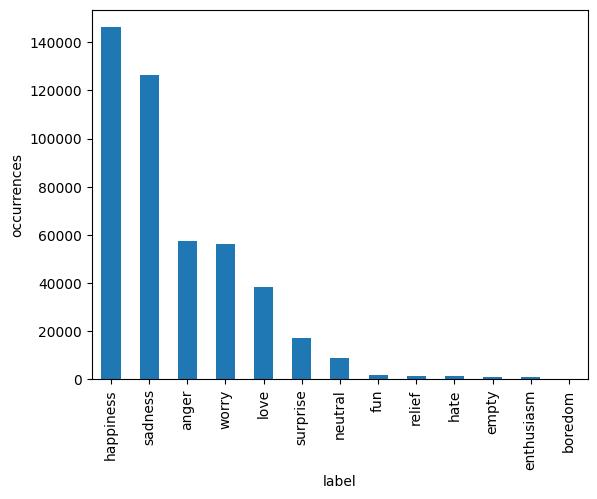

In [8]:
dataset['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')

We merge the less represented classes with the most similar classes.

In [9]:
class_mappings = {
    "happiness": "happiness",
    "sadness": "sadness",
    "anger": "anger",
    "worry": "worry",
    "love": "love",
    "surprise": "surprise",
    "neutral": "neutral",
    "fun": "happiness",
    "relief": "happiness",
    "hate": "anger",
    "empty": "neutral",
    "enthusiasm": "happiness",
    "boredom": "neutral",
}

dataset["label"] = dataset["label"].apply(lambda x: class_mappings[x])

<Axes: xlabel='label', ylabel='occurrences'>

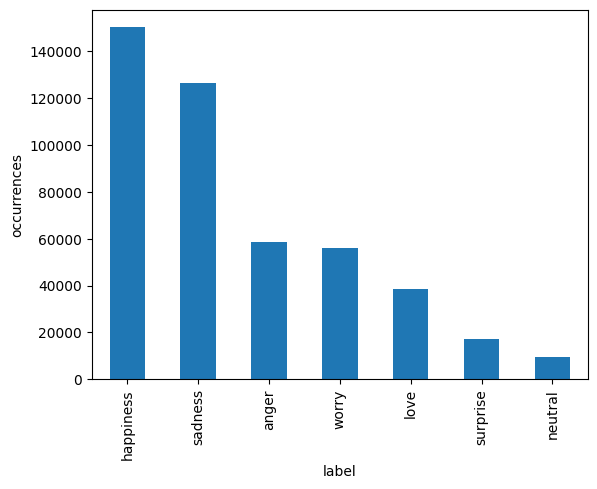

In [10]:
dataset['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')

In [11]:
dataset.to_csv(f"{PROJECT_ROOT}/data/dataset.tsv", sep="\t", index=False)

In [13]:
classes = dataset['label'].unique()
classes

array(['worry', 'sadness', 'love', 'happiness', 'surprise', 'anger',
       'neutral'], dtype=object)